In [3]:
import pickle
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob

In [20]:
class Prep_Data():
    
    def __init__(self, path=None):
        
        with open(path, "rb") as p:
            data = pickle.load(p)
        
        self.vels = data["vels"]
        self.kds = data["kds"]

In [31]:
def make_plots(Datas, colors, labels, size=(15, 15),legend_loc=0):
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=3)
    f, ax = plt.subplots(figsize=size)
    for i in range(len(Datas)):
        ax.plot(Datas[i], "-", color=colors[i], label=labels[i])

    ax.legend(loc=legend_loc)
    plt.xlabel('times')
    plt.ylabel('hip velocity')
    plt.ylim(-0.5,1.6)

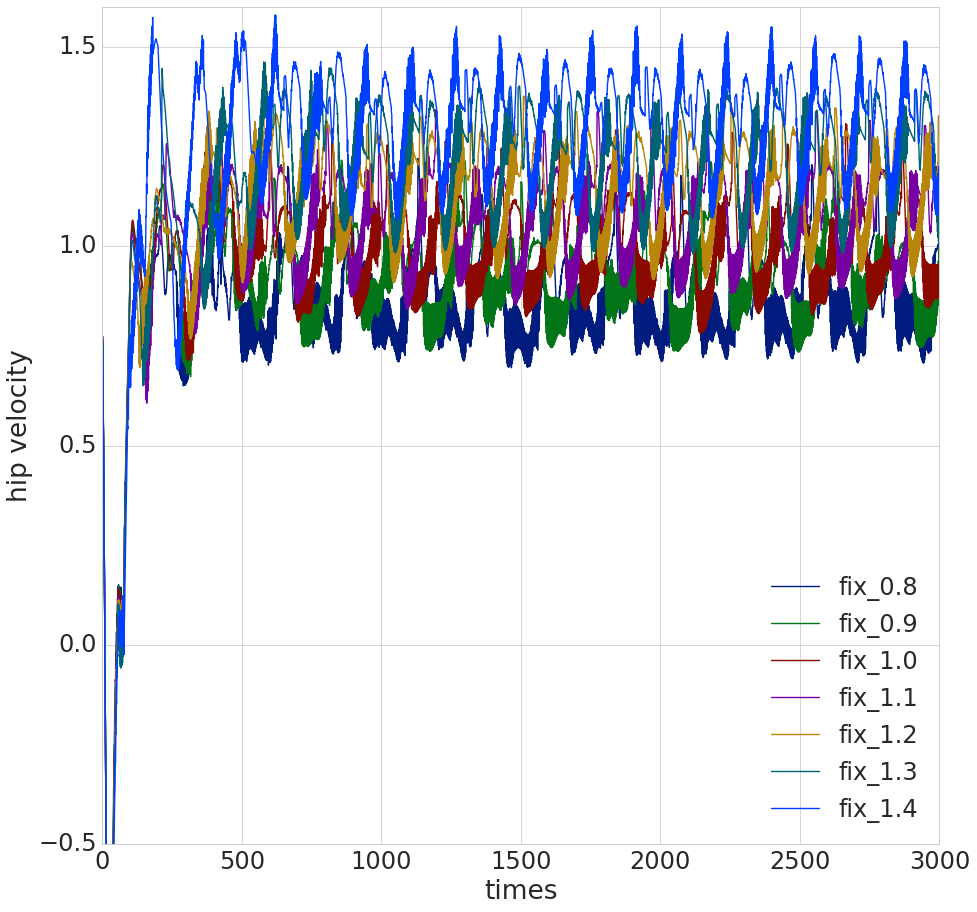

In [35]:
source_files = glob.glob("demo/figure/*/*.pkl")
names = []
vels = []
aves = []
for f in source_files:
    if f.split("figure/")[-1].split("_/")[0].split("_")[0] == "fix":
        v = Prep_Data(path=f).vels
        vels += [v]
        names += [f.split("figure/")[-1].split("_/")[0]]
        aves += [float(names[-1].split("_")[1])]
colors = sns.color_palette("dark") + sns.color_palette("bright")
args = np.argsort(np.array(aves))
Datas = np.array(vels)[args]
Labels = np.array(names)[args]


make_plots(Datas, colors, Labels)